In [8]:
pip show plotly


Name: plotly
Version: 5.11.0
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: e:\anaconda\lib\site-packages
Requires: tenacity
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
from datetime import datetime

In [97]:
covid_df= pd.read_csv("D:/NEU/ALY 6070 - individual/covid_19_india.csv")

In [98]:
covid_df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [99]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [100]:
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [101]:
covid_df.drop(["Sno","Time", "ConfirmedIndianNational","ConfirmedForeignNational"], inplace=True, axis=1)

In [102]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [103]:
# formate of date column
covid_df['Date']= pd.to_datetime(covid_df['Date'], format = '%Y-%m-%d')

In [104]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [105]:
# Active cases= confirmedCases-(cured+deaths)
covid_df['Active_cases']=covid_df['Confirmed']-(covid_df['Cured'] + covid_df['Deaths'])
covid_df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


In [106]:
# pivot table 
statewise = pd.pivot_table(covid_df, values = ['Confirmed', 'Deaths', 'Cured'], index = "State/UnionTerritory", aggfunc = max )


In [107]:
#Recovery rate=totcuredcases/confirmedcases*100
statewise['Recovery Rate'] = statewise['Cured']*100/statewise['Confirmed']

In [108]:
#Mortality rate
statewise['Mortality Rate'] = statewise['Deaths']*100/statewise['Confirmed']

In [109]:
#Sort values based on conformed cases columns
statewise = statewise.sort_values(by = 'Confirmed',ascending = False)

In [110]:
#plotting pivot table
statewise.style.background_gradient(cmap = "Blues")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


In [50]:
# top 10  active cases based on states
#top_10_active_cases=covid_df.groupby(by = 'State/UnionTerritory').max()[['Active_cases', 'Date']].sort_values(by = ['Active_cases'], ascending = False).reset_index()

In [51]:
#fig = plt.figure(figsize = (16,9))

In [52]:
#plt.title("Top 10 states based on active cases ", size = 20)

In [53]:
#ax = sns.barplot(data = top_10_active_cases.iloc[:10], y = "Active_cases", x = 'State/UnionTerritory', linewidth = 2, edgecolor = "red")

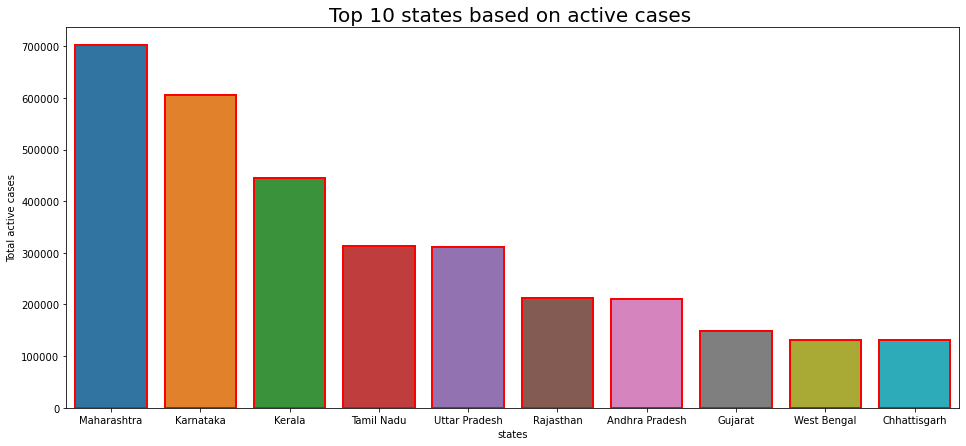

In [111]:
# top 10  active cases based on states
top_10_active_cases=covid_df.groupby(by = 'State/UnionTerritory').max()[['Active_cases', 'Date']].sort_values(by = ['Active_cases'], ascending = False).reset_index()

fig = plt.figure(figsize = (16,7))

plt.title("Top 10 states based on active cases ", size = 20)

ax = sns.barplot(data = top_10_active_cases.iloc[:10], y = "Active_cases", x = 'State/UnionTerritory', linewidth = 2, edgecolor = "red")

plt.xlabel("states")

plt.ylabel("Total active cases")

plt.show()

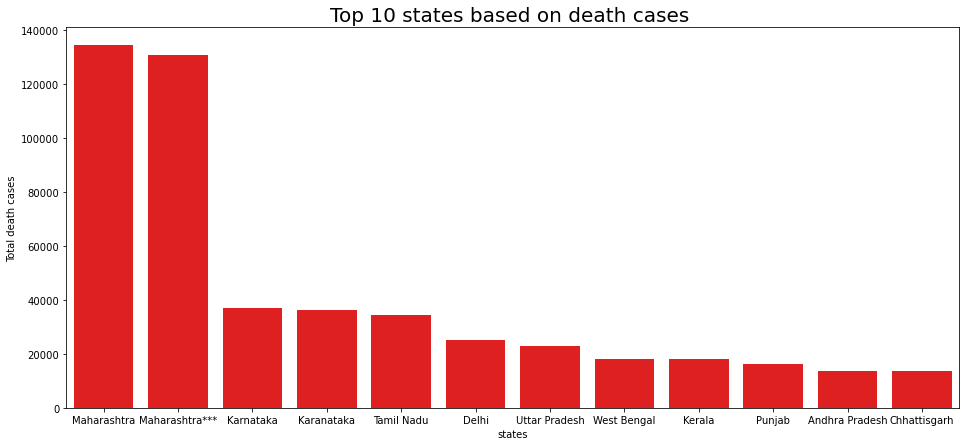

In [115]:
# top 10  active cases based on states
top_10_death=covid_df.groupby(by = 'State/UnionTerritory').max()[['Deaths', 'Date']].sort_values(by = ['Deaths'], ascending = False).reset_index()

fig = plt.figure(figsize = (16,7))

plt.title("Top 10 states based on death cases ", size = 20)

ax = sns.barplot(data = top_10_death.iloc[:12], y = "Deaths", x = 'State/UnionTerritory', linewidth = 2, color = 'red')

plt.xlabel("states")

plt.ylabel("Total death cases")

plt.show()

Text(0.5, 1.0, 'Top 5 affected states')

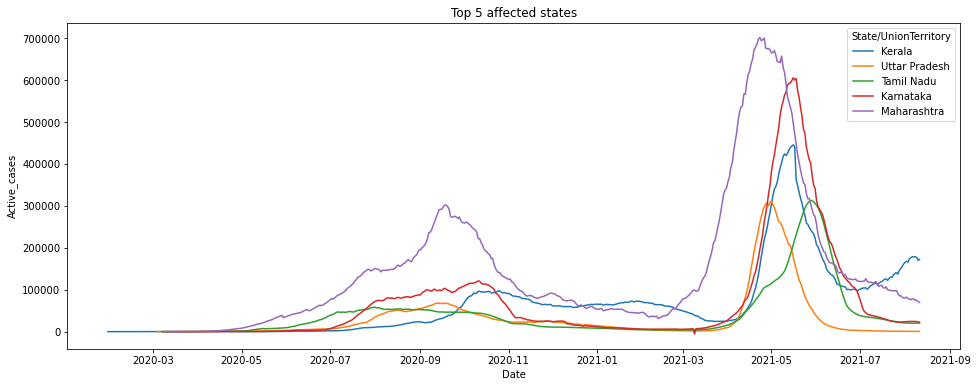

In [113]:
# growth trend

fig = plt.figure(figsize = (16,6))

ax = sns.lineplot(data = covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra','Karnataka', 'Kerala','Tamil Nadu', 'Uttar Pradesh'])],x = 'Date',y = "Active_cases", hue = 'State/UnionTerritory')

ax.set_title("Top 5 affected states")